In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [3]:
from tqdm.auto import tqdm

In [4]:
Data = pd.read_csv("./breath_csv_2/Breath.csv")

In [6]:
unique = np.unique(Data.iloc[:,73])
asthmatic = np.array([i for i in unique if i.find("sthma") != -1])
B = pd.DataFrame()
for i in asthmatic:
    B = B.append(Data[Data.iloc[:,73] == i])
B.iloc[:,72] = 1
B.reset_index(inplace=True,drop=True )

In [7]:
B

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.992360,-17.386529,-3.713637,-3.191119,5.859474,0.345634,-10.617331,-1.752087,2.475118,2.693879,...,11.000591,11.910034,13.120485,9.530460,8.976875,8.839848,13.681052,9.747090,1,4012_P_Asthma_F_after_Mil_Y.json
1,-1.523400,-18.528801,-3.163837,-6.871339,5.111507,-0.585330,-8.495219,0.488026,0.083253,-0.440658,...,9.600833,11.383878,11.788427,11.197872,8.518983,7.830064,10.458960,9.223463,1,4012_P_Asthma_F_after_Mil_Y.json
2,-1.411141,-20.331110,-1.113288,-6.023631,4.993796,0.388513,-7.779792,-0.079205,2.259564,1.239153,...,9.406953,10.682132,11.434059,8.112442,7.457294,7.759565,8.713331,7.292228,1,4012_P_Asthma_F_after_Mil_Y.json
3,-2.155340,-24.558919,-3.045152,-6.510205,6.475217,-3.859762,-8.772067,-1.342511,-0.905882,-0.410696,...,8.981799,13.038493,11.325451,9.754742,8.704969,8.122480,11.141158,8.056709,1,4012_P_Asthma_F_after_Mil_Y.json
4,-2.007399,-22.700796,-4.947997,-6.363454,6.387438,-2.575076,-7.979208,3.622297,1.294504,2.566039,...,9.235723,12.688381,10.722323,8.588885,8.292685,7.478709,12.817434,8.821254,1,4012_P_Asthma_F_after_Mil_Y.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,-3.898049,-7.233605,-1.025047,-5.777293,-0.724047,-5.892306,4.370627,0.144697,10.008242,-2.132467,...,10.162204,11.357441,11.456590,11.242080,15.842389,9.685064,10.915464,12.693437,1,4992_P_Asthma_F_before_Sev_Y.json
1474,-4.285375,-8.433305,0.270769,-8.100339,3.341875,-9.133463,5.029009,-1.403047,8.877016,0.170385,...,10.009282,12.645159,10.762908,9.100924,12.699652,9.542287,8.789426,9.129319,1,4992_P_Asthma_F_before_Sev_Y.json
1475,-3.811823,-9.903934,-3.772771,-7.583742,-4.782840,-12.172118,3.788461,0.497483,5.728714,-1.118452,...,10.430437,18.370319,11.829051,12.468859,15.646574,10.682694,10.980994,12.933565,1,4992_P_Asthma_F_before_Sev_Y.json
1476,-3.923348,-7.312954,-0.023111,-11.368536,-4.578872,-10.603922,2.769039,-6.529305,8.070058,-1.383550,...,13.333003,15.144048,11.818425,13.294185,14.625092,10.264452,10.587764,10.356953,1,4992_P_Asthma_F_before_Sev_Y.json


### Experiment 1 Asthmatic 

#### 1.1 Before patients only

In [20]:
C = pd.DataFrame()
before = [i for i in unique if i.find("efore") != -1]
for i in before:
    C = C.append(B[B.iloc[:,73] == i])
male = [i for i in before if i.find("_M_")!=-1]
female = [i for i in before if i.find("_F_")!=-1]

In [23]:
D = pd.DataFrame()
for i in female:
    D = D.append(C[C.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(C[C.iloc[:,73] == i])
    

In [29]:
D.reset_index(drop=True, inplace=True)

In [30]:
shuffle(D).head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
1,-0.813140,-17.706572,-3.744230,-6.099452,6.050704,-1.579853,-9.543046,-2.005879,1.278881,2.499644,...,11.071443,17.039784,13.457822,12.112046,7.843983,8.580431,11.358987,8.953209,0,4012_P_Asthma_F_before_Mil_Y.json
115,-2.237005,-2.195928,-12.500357,7.147363,-9.542415,-16.041633,8.834962,-14.241280,7.799216,-5.986996,...,15.186548,18.459889,15.367375,17.146097,15.559636,12.253785,13.241594,9.830571,0,4477_P_Asthma_F_before_Mod_Y.json
264,-4.204104,-9.294133,1.501603,-8.387007,2.918850,-7.649338,6.928434,-7.296542,7.012939,-0.580156,...,8.454324,11.104448,11.931066,12.281170,10.969307,8.636217,9.102033,8.505884,0,4992_P_Asthma_F_before_Sev_Y.json
383,0.277610,-20.737433,1.700774,-2.918531,1.927008,-12.901967,-6.314430,-6.616913,-1.391299,1.198021,...,11.954476,16.723666,13.193205,15.212912,10.176293,10.898003,8.820803,9.376920,1,4346_P_Asthma_M_before_Sev_Y.json
327,0.532559,-20.872479,-0.298110,-0.090743,-1.140891,-4.516206,-3.101671,-5.929923,0.390253,0.639500,...,6.535178,12.881716,11.398566,11.289263,7.716521,7.507329,9.221777,7.867575,1,4185_P_Asthma_M_before_Mil_Y.json


In [31]:
def count(list_array, print_dist = True, ret = None):
    Total = list_array
    name = []
    for i in Total:
        name.append(i[:4])
    unique = []
    before_after = []
    for i in Total:
        if np.sum((np.array(name, dtype = int) == int(i[:4]))) == 1:
            unique.append(i)
        else:
            before_after.append(i) 

    Asthmatic_Female = []
    Asthmatic_Male = []
    Healthy_Male = []
    Healthy_Female = []
    NAsthma = []
    before = {"male" : [], "female" : []}
    after = {"male" : [], "female" : []}
    for file in unique:
        if file.split("_")[2] == 'Asthma' or file.split("_")[2] == 'asthma' :
            if file.find("_M_")!=-1:
                Asthmatic_Male.append(file)
            if file.find("_F_")!=-1:
                Asthmatic_Female.append(file)
        if file.split("_")[2] == 'NAsthma':
            NAsthma.append(file)
        if file.find("_C_")!=-1:
            if file.find("_M_")!=-1:
                Healthy_Male.append(file)
            if file.find("_F_")!=-1:
                Healthy_Female.append(file)

    for file in before_after:
            if file.find("efore") != -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    before["male"].append(file)
                if file.find("_F_")!=-1:
                    before["female"].append(file)
            if file.find("fter")!= -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    after["male"].append(file)
                if file.find("_F_")!=-1:
                    after["female"].append(file)
    if print_dist:
        print(f"Total = {len(Total)}")
        print(f"Asthmatic_male = {len(Asthmatic_Male)+ len(before['male'])+len(after['male'])}")
        print(f"Asthmatic_female = {len(Asthmatic_Female)+ len(before['female'])+len(after['female'])}")
        print(f"Healthy_Male = {len(Healthy_Male)}")
        print(f"Healthy_female = {len(Healthy_Female)}")
        print(f"Asthmatic_male_unique = {len(Asthmatic_Male)}")
        print(f"Asthmatic_female_unique = {len(Asthmatic_Female)}")
        print(f"Before_after = {len(before_after)}")
        print(f"Before_male = {len(before['male'])}")
        print(f"Before_female = {len(before['female'])}")
        print(f"after_male = {len(after['male'])}")
        print(f"after_female = {len(after['female'])}")
        print(f"NAsthma = {len(NAsthma)}")
        
              
    if ret != None:
        D = {"Total": Total, "Asthmatic_male": Asthmatic_Male, "Asthmatic_female": Asthmatic_Female, "Healthy_Male": Healthy_Male,
            "Healthy_Female": Healthy_Female, "before_after": before_after, "before": before, "after": after}
        return D[ret]

In [32]:
count(list(np.unique(D.iloc[:,73])))

Total = 67
Asthmatic_male = 34
Asthmatic_female = 27
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 34
Asthmatic_female_unique = 27
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma = 6


In [60]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,3):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(before,Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.1/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.1/Test/test_{str(i)}.txt", Test[0], '%s')

In [138]:
# Training and Testing
# C = shuffle(C, random_state= 22) 
def experiment(dataframe, path, svm_c = 1, svm_gamma = 'auto', plot = True):
    C = dataframe
    Test_accuracy = []
    Test_F1 = []
    Train_accuracy = []
    Train_F1 = []
    AUC = []

    FPR = []
    TPR = []
    THRESH = []

    for i in tqdm(range(0,5)):
        Train_dataframe = pd.DataFrame()
        Test_dataframe = pd.DataFrame()
        Train = np.loadtxt(f"./male_female_classification/{path}/Train/train_{str(i)}.txt", 'str')
        Test = np.loadtxt(f"./male_female_classification/{path}/Test/test_{str(i)}.txt", 'str')

        for j in range(0,len(Train)):
            Train_dataframe = Train_dataframe.append(C[C.iloc[:,73] == Train[j]])

        for j in range(0,len(Test)):
            Test_dataframe = Test_dataframe.append(C[C.iloc[:,73] == Test[j]]) 


        Train_dataframe = shuffle(Train_dataframe, random_state= 42)

        scaler = StandardScaler()
        scaler.fit(C.iloc[:,:72])

        X_train = pd.DataFrame(scaler.transform(Train_dataframe.iloc[:,:72]))
        y_train = Train_dataframe.iloc[:,72]
        X_test = pd.DataFrame(scaler.transform(Test_dataframe.iloc[:,:72]))
        y_test = Test_dataframe.iloc[:,72]

        X_train.reset_index(drop=True, inplace= True)
        X_test.reset_index(drop=True, inplace= True)
        y_train.reset_index(drop=True, inplace= True)
        y_test.reset_index(drop=True, inplace= True)


        model = svm.SVC(C = svm_c,gamma=svm_gamma, probability=True)
        model.fit(X_train,y_train)

        Train_accuracy.append(metrics.accuracy_score(y_train, model.predict(X_train)))
        Test_accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))

        Train_F1.append(metrics.f1_score(y_train, model.predict(X_train)))
        Test_F1.append(metrics.f1_score(y_test, model.predict(X_test))) 

        pred_prob = model.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        FPR.append(fpr)
        TPR.append(tpr)
        THRESH.append(thresh)
        AUC.append(auc_score)
    if plot == True:
        plt.style.use('seaborn')
        color = ['orange', 'green', 'yellow', 'black', 'red']
        for i in range(0, len(AUC)):
            plt.plot(FPR[i], TPR[i], linestyle='--',color=color[i], label=f'model_{str(i)}_AUC:{AUC[i]}')

        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
#         plt.savefig('ROC_Male_female_classification_',dpi=300)
        plt.show();

        print(f"Mean Test Accuracy:{np.mean(Test_accuracy)*100}% with SD: {np.std(Test_accuracy)*100}%")
        print(f"Mean Train Accuracy:{np.mean(Train_accuracy)*100}%")
        print(f"Mean Test F1:{np.mean(Test_F1)*100}%")
        print(f"Mean Test AUC:{np.mean(AUC)*100}%")
        
    return Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1

  0%|          | 0/3 [00:00<?, ?it/s]

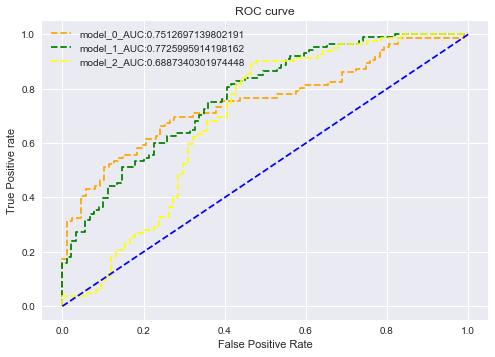

Mean Test Accuracy:67.80425644316595% with SD: 1.1020899474133865%
Mean Train Accuracy:99.83837220236977%
Mean Test F1:70.01633986928105%
Mean Test AUC:73.753444519916%


In [77]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.1', svm_c=5)

#### 1.2 After Patients M/F

In [78]:
C = pd.DataFrame()
after = [i for i in unique if i.find("fter") != -1]
for i in after:
    C = C.append(B[B.iloc[:,73] == i])
male = [i for i in after if i.find("_M_")!=-1]
female = [i for i in after if i.find("_F_")!=-1]

In [79]:
D = pd.DataFrame()
for i in female:
    D = D.append(C[C.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(C[C.iloc[:,73] == i])

In [81]:
count(list(np.unique(D.iloc[:,73])))

Total = 101
Asthmatic_male = 56
Asthmatic_female = 41
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 56
Asthmatic_female_unique = 41
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma = 4


In [82]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,4):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(after,Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.2/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.2/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/4 [00:00<?, ?it/s]

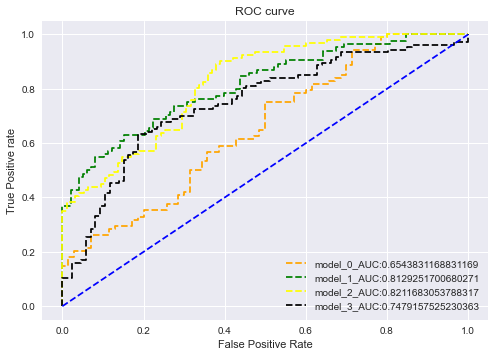

Mean Test Accuracy:65.8744734151788% with SD: 3.1819117157762116%
Mean Train Accuracy:96.62077255626129%
Mean Test F1:69.41178635550256%
Mean Test AUC:75.9098086213253%


In [86]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.2')

#### 1.3 All astmatic

In [94]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [97]:
D = pd.DataFrame()
for i in female:
    D = D.append(B[B.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(B[B.iloc[:,73] == i])

In [100]:
count(list(np.unique(D.iloc[:,73])))

Total = 168
Asthmatic_male = 90
Asthmatic_female = 68
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 46
Asthmatic_female_unique = 28
Before_after = 84
Before_male = 22
Before_female = 20
after_male = 22
after_female = 20
NAsthma = 10


In [101]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,4):
    Test = []
    Test.append(list(np.concatenate((male[i*15:15+i*15],female[i*15:15+i*15]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.3/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.3/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/4 [00:00<?, ?it/s]

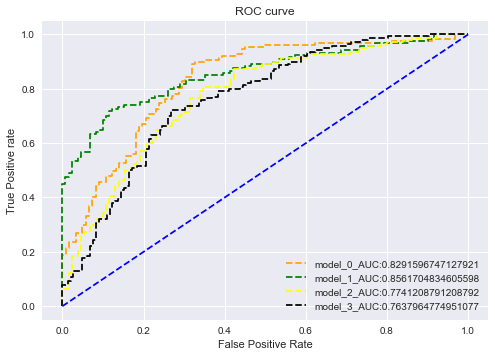

Mean Test Accuracy:72.51276853374486% with SD: 3.0402447500978735%
Mean Train Accuracy:95.59639019536252%
Mean Test F1:74.81885386495829%
Mean Test AUC:80.58118786973345%


In [102]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.3')

### Experiment_2: Healthy Controls

In [103]:
unique = np.unique(Data.iloc[:,73])
controls = np.array([i for i in unique if i.find("_C_") != -1])
B = pd.DataFrame()
for i in controls:
    B = B.append(Data[Data.iloc[:,73] == i])
# B.iloc[:,72] = 1
B.reset_index(inplace=True,drop=True )

In [107]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [113]:
D = pd.DataFrame()
for i in male:
    D= D.append(B[B.iloc[:,73] == i])

D.iloc[:,72] = 1

for i in female:
    D = D.append(B[B.iloc[:,73] == i])


In [116]:
count(list(np.unique(D.iloc[:,73])))

Total = 106
Asthmatic_male = 0
Asthmatic_female = 0
Healthy_Male = 55
Healthy_female = 51
Asthmatic_male_unique = 0
Asthmatic_female_unique = 0
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma = 0


In [117]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,4):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_2/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_2/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/4 [00:00<?, ?it/s]

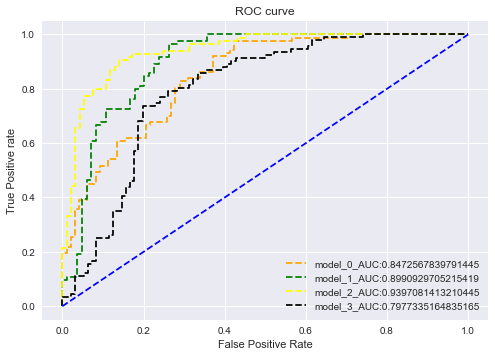

Mean Test Accuracy:80.05451694980933% with SD: 5.6261606228145755%
Mean Train Accuracy:97.75083668837901%
Mean Test F1:80.0126297699604%
Mean Test AUC:87.09478530763118%


In [123]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_2/', svm_c = 1)

### Experiment 3 Taking both Asthmatic and Healthy Patients

In [126]:
unique = np.unique(Data.iloc[:,73])
male = [i for i in unique if i.find("_M_")!=-1]
female = [i for i in unique if i.find("_F_")!=-1]

In [132]:
Data.iloc[:,72] = 0
D = pd.DataFrame()
for i in male:
    D= D.append(Data[Data.iloc[:,73] == i])

D.iloc[:,72] = 1

for i in female:
    D = D.append(Data[Data.iloc[:,73] == i])


In [146]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,5):
    Test = []
    Test.append(list(np.concatenate((male[i*20:20+i*20],female[i*20:20+i*20]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_3/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_3/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/5 [00:00<?, ?it/s]

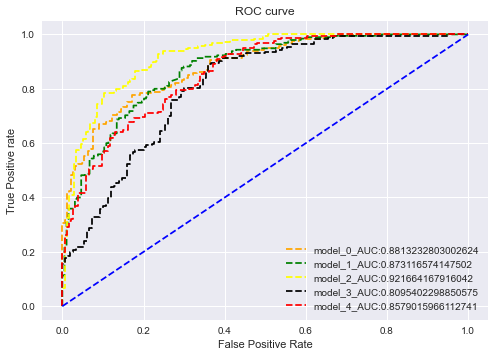

Mean Test Accuracy:77.0560016072675% with SD: 4.376904389416521%
Mean Train Accuracy:92.42242440554296%
Mean Test F1:78.7189337838739%
Mean Test AUC:86.87091697720275%


In [151]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_3/', svm_c = 0.5)